<a href="https://colab.research.google.com/github/vitaoTM/Alura-BootCamp-DataScience/blob/main/An%C3%A1lise_do_numero_de_obitos_por_regi%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos números de óbitos por região no Brasil

Neste notebook, será feito uma análise do numero de óbitos no brasil desde 2008, com o intuito de entender variações sazonais na mudança populacional.

In [71]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Dados Utilizados 
* tabnet DATASUS
- A tabela csv esta no meu drive, nao lembro se dixei acesso livre para todos, mas baixei aqui 

* https://datasus.saude.gov.br/informacoes-de-saude-tabnet/


* Me ultilizei de algumas aulas de python da alura (seleções e frequências)

* Também dei uma olhada nos portifolios daqueles que participaram do bootcamp e usei algumas ideias: https://github.com/rodrigodemend/Analise_Sazonalidade_de_Internacoes

In [72]:
from google.colab import drive                                                  # montando google drive para poder baixar os dados  
drive.mount('/content/drive')                                                   #diretamente


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
### Importando dados e criando um DataFrame com eles
sel_encode= "ISO-8859-1"
url = "/content/drive/MyDrive/ALURA DATA SCIENCE/Modulo_1/Desafio1/A005158189_28_143_208.csv"
pd.options.display.float_format='{:.2f}'.format
dados = pd.read_csv(url, sep=";", encoding = sel_encode,
                    skipfooter=12, skiprows=3, thousands='.', decimal=',' )
dados = dados.replace('-', np.nan)
dados.head()                                                                    # Visualizando as 5 primeiras linhas do DataFrame                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,358,450,480,414,295,270,366,447,428,812,736,652,541,407,359,340,294,288,41062
1,12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,NaN,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,335,309,121,223,182,169,156,140,20250
2,13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1338,1637,1898,1218,897,881,860,686,612,548,501,71297
3,14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,299,210,168,180,188,190,156,143,103,13816
4,15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2221,1528,1765,1197,1021,1084,1074,1182,1294,1557,2179,2502,1603,1307,1286,1247,1127,955,152188


# Limpando Dados obtidos

In [75]:
dados_obitos = dados.set_index('Unidade da Federação')                          # Limpando dados, setando novo index como coluna da Unidade da Federação
dados_obitos                                                                    # Visualizando novos dados

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,...,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,358,450,480,414,295,270,366,447,428,812,736,652,541,407,359,340,294,288,41062
12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,NaN,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,...,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,335,309,121,223,182,169,156,140,20250
13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,...,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1338,1637,1898,1218,897,881,860,686,612,548,501,71297
14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,...,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,299,210,168,180,188,190,156,143,103,13816
15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,...,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2221,1528,1765,1197,1021,1084,1074,1182,1294,1557,2179,2502,1603,1307,1286,1247,1127,955,152188
16 Amapá,65,81,42,51,34,42,52,52,59,83,58,84,68,68,48,91,64,77,69,75,82,71,66,76,90,80,68,80,43,84,78,50,73,54,76,70,81,79,52,75,...,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,180,259,182,156,133,132,90,82,14219
17 Tocantins,141,210,253,199,173,216,229,202,189,164,195,196,165,247,168,171,206,202,218,218,210,242,200,161,229,223,256,205,211,202,233,222,187,241,226,209,216,233,206,241,...,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,285,233,257,314,437,338,351,411,353,333,407,355,335,38029
21 Maranhão,202,320,308,335,374,307,363,409,354,319,216,330,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,515,...,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1933,1491,1138,1051,1111,1063,859,1072,1170,1940,2003,1984,1702,1621,1301,1123,1013,989,125415
22 Piauí,224,337,337,277,368,358,368,294,358,363,355,276,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,371,...,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,763,812,1037,1109,1101,899,872,699,663,549,82884


In [76]:
# Transpondo DataFrame
dados_obitos = dados_obitos.T
dados_obitos

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,57,30,149,23,543,65,141,202,224,548,204,449,662,191,56,795,2251,232,1132,4762,1342,800,1415,215,206,563,345
2008/Fev,99,94,243,21,581,81,210,320,337,1021,238,519,963,262,135,1192,3396,324,1423,6849,2099,1115,2737,348,381,757,403
2008/Mar,45,76,312,23,655,42,253,308,337,1142,370,513,1136,262,248,1172,3729,426,2481,7525,1948,1090,2565,306,338,595,405
2008/Abr,43,103,320,38,524,51,199,335,277,1231,341,562,1728,307,223,1466,3437,489,2218,7818,1894,1080,2562,301,425,710,482
2008/Mai,54,94,240,26,622,34,173,374,368,1144,389,488,1218,288,170,1522,3638,374,2792,9152,1994,1032,2232,394,335,627,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/Ago,359,182,686,190,1286,133,333,1301,872,2193,869,964,2816,760,541,3306,7257,287,6111,15023,4837,2730,4523,1184,1170,2150,759
2021/Set,340,169,612,156,1247,132,407,1123,699,2153,696,914,2329,692,419,3212,6065,249,6087,12613,4251,2240,3916,1052,821,1873,811
2021/Out,294,156,548,143,1127,90,355,1013,663,1687,546,838,2421,703,496,2827,5767,258,5047,11238,3834,2219,3715,675,737,1492,767
2021/Nov,288,140,501,103,955,82,335,989,549,1676,567,810,2307,592,491,2709,5290,229,4734,10904,3565,2149,3639,772,549,762,643


* Procurei referencia no StackOverflow de como mudar o tipo NaN para int64
* https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int

In [77]:
# Visualizando se existe valores NaN no DataFrame
dados_obitos.isnull().sum()


Unidade da Federação
11 Rondônia               0
12 Acre                   1
13 Amazonas               0
14 Roraima                0
15 Pará                   0
16 Amapá                  0
17 Tocantins              0
21 Maranhão               0
22 Piauí                  0
23 Ceará                  0
24 Rio Grande do Norte    0
25 Paraíba                0
26 Pernambuco             0
27 Alagoas                0
28 Sergipe                0
29 Bahia                  0
31 Minas Gerais           0
32 Espírito Santo         0
33 Rio de Janeiro         0
35 São Paulo              0
41 Paraná                 0
42 Santa Catarina         0
43 Rio Grande do Sul      0
50 Mato Grosso do Sul     0
51 Mato Grosso            0
52 Goiás                  0
53 Distrito Federal       0
dtype: int64

* Percebe-se que existem valores NaN na coluna do Acre

In [81]:
dados_obitos['12 Acre'].fillna(int(dados_obitos['12 Acre'].mean()),             # Tirando valores NaN e subistituindo pela media da coluna 
                               inplace= True)
dados_obitos.isnull().sum()


Unidade da Federação
11 Rondônia               0
12 Acre                   0
13 Amazonas               0
14 Roraima                0
15 Pará                   0
16 Amapá                  0
17 Tocantins              0
21 Maranhão               0
22 Piauí                  0
23 Ceará                  0
24 Rio Grande do Norte    0
25 Paraíba                0
26 Pernambuco             0
27 Alagoas                0
28 Sergipe                0
29 Bahia                  0
31 Minas Gerais           0
32 Espírito Santo         0
33 Rio de Janeiro         0
35 São Paulo              0
41 Paraná                 0
42 Santa Catarina         0
43 Rio Grande do Sul      0
50 Mato Grosso do Sul     0
51 Mato Grosso            0
52 Goiás                  0
53 Distrito Federal       0
dtype: int64

* **Nao existem mais valores NaN** 

In [85]:
dados_obitos = dados_obitos.astype('int')                                       # passando colunas para  int
dados_obitos.dtypes                                                             # verificando se erro

Unidade da Federação
11 Rondônia               int64
12 Acre                   int64
13 Amazonas               int64
14 Roraima                int64
15 Pará                   int64
16 Amapá                  int64
17 Tocantins              int64
21 Maranhão               int64
22 Piauí                  int64
23 Ceará                  int64
24 Rio Grande do Norte    int64
25 Paraíba                int64
26 Pernambuco             int64
27 Alagoas                int64
28 Sergipe                int64
29 Bahia                  int64
31 Minas Gerais           int64
32 Espírito Santo         int64
33 Rio de Janeiro         int64
35 São Paulo              int64
41 Paraná                 int64
42 Santa Catarina         int64
43 Rio Grande do Sul      int64
50 Mato Grosso do Sul     int64
51 Mato Grosso            int64
52 Goiás                  int64
53 Distrito Federal       int64
dtype: object

Text(0.5, 0, 'Unidade Da Federação')

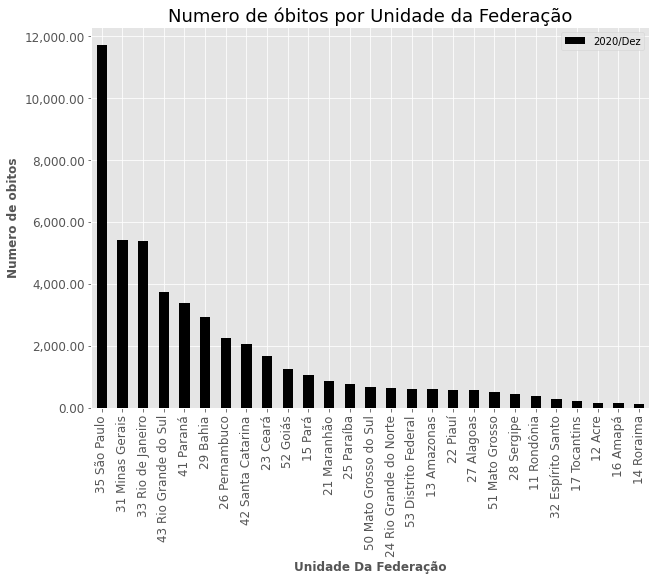

In [79]:
mes_ano = '2020/Dez'                                                            # Definindo uma variavel com uma data 
dados = dados.sort_values(ascending=False, by = mes_ano)                        # Colocando em ordem decrescente do n. de obitos
plt.style.use('ggplot')                                                         # Escolhendo o estilo de grafico
ax = dados.plot(x="Unidade da Federação", y= mes_ano, kind='bar',               # Plotando grafico e setando os paramentros 
                figsize=(10,7), fontsize=(12), color='black')
plt.title('Numero de óbitos por Unidade da Federação', fontsize=(18))                           # Colocando o Titulo do gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))             # Melhorando a visualização dos numeros no eixo y
ax.yaxis.set_label_text('Numero de obitos', weight='bold')
ax.xaxis.set_label_text('Unidade Da Federação', fontsize=(12), weight='bold')    # Colocando titulo do eixo x

In [86]:
round(dados['2021/Ago'].mean())

2327